In [17]:
import torch
import numpy as np

from utils.utils import *
from utils.dataloader import *
from utils.nop import *

import matplotlib.pyplot as plt

In [18]:
# Data and model location
data_path = 'data/era5_Santos_2022-2023.nc'
bath_path = 'data/era5_Santos_2022-2023_bath.nc'

device = torch.device('cuda')

In [19]:
D = data_loader(data_path,bath_path)

In [20]:
d = D.sample_graph(1000, 0, radius=500000, n_connections=0, validation=False, seed=0)

Text(0.5, 1.0, 'bath')

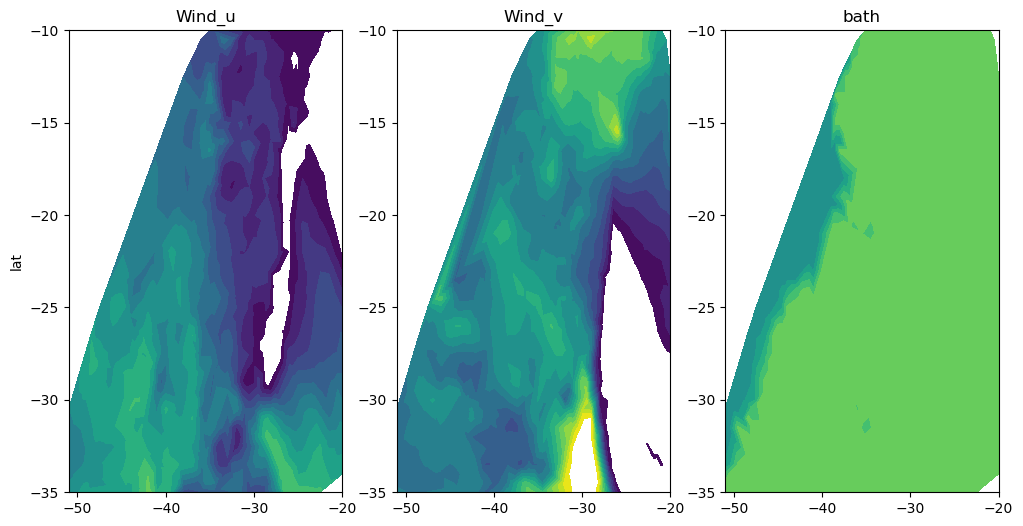

In [21]:
X = d.coords
F = d.x.cpu().detach().numpy()

n_contours = 16

plt.figure(figsize=(12,6))

contours = 2*np.linspace(-1,1,n_contours)

plt.subplot(1,3,1)
plt.tricontourf(X[:,0],X[:,1],F[:,0],contours)
plt.title('Wind_u')
plt.ylabel('lat')

plt.subplot(1,3,2)
plt.tricontourf(X[:,0],X[:,1],F[:,1],contours)
plt.title('Wind_v')

plt.subplot(1,3,3)
plt.tricontourf(X[:,0],X[:,1],F[:,2],contours)
plt.title('bath')

In [34]:
from torch_geometric.loader import DataLoader

# Load data and generate meshes
data_train = []
for i in range(100):

    n = randintlog(100,1000)

    data_train.append(D.sample_graph(n, i, radius=500000))

    print(f'Train sample: {i}, Nodes: {n}, Edges: {data_train[-1].edge_index.shape[1]}')

Train sample: 0, Nodes: 176, Edges: 2980
Train sample: 1, Nodes: 193, Edges: 3861
Train sample: 2, Nodes: 172, Edges: 2880
Train sample: 3, Nodes: 669, Edges: 45687
Train sample: 4, Nodes: 150, Edges: 2416
Train sample: 5, Nodes: 547, Edges: 29687
Train sample: 6, Nodes: 762, Edges: 57834
Train sample: 7, Nodes: 139, Edges: 1953
Train sample: 8, Nodes: 679, Edges: 48071
Train sample: 9, Nodes: 176, Edges: 3150
Train sample: 10, Nodes: 476, Edges: 23356
Train sample: 11, Nodes: 111, Edges: 1231
Train sample: 12, Nodes: 789, Edges: 62393
Train sample: 13, Nodes: 478, Edges: 23558
Train sample: 14, Nodes: 100, Edges: 1120
Train sample: 15, Nodes: 193, Edges: 3977
Train sample: 16, Nodes: 192, Edges: 3654
Train sample: 17, Nodes: 756, Edges: 57368
Train sample: 18, Nodes: 201, Edges: 4259
Train sample: 19, Nodes: 266, Edges: 6656
Train sample: 20, Nodes: 577, Edges: 32613
Train sample: 21, Nodes: 201, Edges: 3977
Train sample: 22, Nodes: 312, Edges: 10408
Train sample: 23, Nodes: 688, Edge

In [53]:
loader_train = DataLoader(data_train, batch_size=1, shuffle=False)

In [54]:
for batch in loader_train:
    batch

In [55]:
batch

DataBatch(x=[184, 3], edge_index=[2, 3406], edge_attr=[3406, 3], y=[184], coords=[1], batch=[184], ptr=[2])

In [56]:
batch.edge_index

tensor([[  0,   0,   0,  ..., 183, 183, 183],
        [  0, 114, 166,  ...,  10,  46,  12]])